# Assignment 1 task 1
## Data dimensionality, distance-based classifiers
From the instructions:  
*The purpose of this task is to develop some intuitions about clouds of points in high-dimensional spaces. In
particular, you are supposed to use dimensionality reduction techniques to visualize your data, develop a
very simple algorithm for classifying hand-written digits and compare it to another distance-based classifier.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.aspect'] = 'auto'

### Read training data:
* `train_im` = images of numbers with shape (1706, 256) pixel. 
     * Reshape them from 256 to 16x16 and call the array `tim`
* `labels` = correct labeling of each image 
    * Convert to array of integers

In [2]:
train_in = pd.read_csv('train_in.csv').to_numpy()
tim = np.array([x.reshape(16,16) for x in train_in])

labels = pd.read_csv('train_out.csv').to_numpy()
labels = np.array([int(x) for x in labels])

Npix = train_in.shape[1]
print(train_in.shape)
print(tim.shape)
print(labels.shape)

(1706, 256)
(1706, 16, 16)
(1706,)


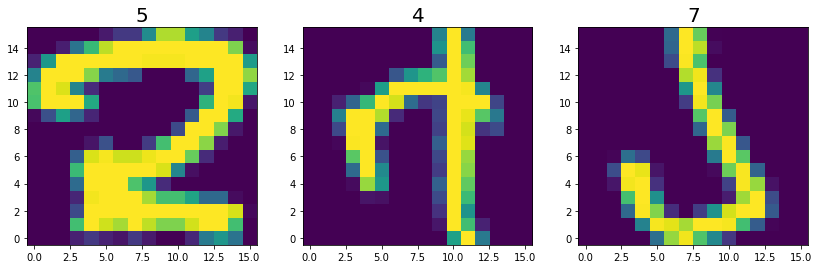

In [3]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

for i in range(len(ax)):
    ax[i].imshow(tim[i])
    ax[i].set_title(labels[i], fontsize=20)
plt.show()

## 1.1 Group images by number and compute the center
For each digit $d$ ($d = 0,1,...,9$) consider a cloud of points $C_d$ with dimension ($N_d$, 256) where $N_d$ is the number of images beloging to number $d$. For each cloud, we can take the center $c_d$ as the mean over $N_d$, resulting in another 256-dim-vector.  
I define a list containing the clouds for every number: `storm`.

In [4]:
storm = [train_in[np.where(labels==x)] for x in range(0,10)]
centers = [np.mean(storm[x], axis=0) for x in range(0,10)]
# Print how many images of each number we have
print('Number \t:\tN_images')
print('-------------------------')
for n in range(10):
    print('{:2} \t:\t {:3}'.format(n+1, storm[n].shape[0]))

Number 	:	N_images
-------------------------
 1 	:	 319
 2 	:	 252
 3 	:	 202
 4 	:	 131
 5 	:	 122
 6 	:	  88
 7 	:	 150
 8 	:	 166
 9 	:	 144
10 	:	 132


### Calculate distance between the centers

In [5]:
def distance(arr1, arr2):
    return np.sqrt(np.sum(np.power(arr1 - arr2, 2)))

N = len(storm)
# Set up array to store the distance between pairs
dist = np.zeros((N,N))
# Loop twice to get all the pairs
for i in range(N):
    arr1 = centers[i]
    for j in range(N):
        arr2 = centers[j]
        dist[i,j] = distance(arr1, arr2)

Next we plot the resulting 2D array. The higher the distance the easiest it is to labeling them correctly. We observe that **the pair (1,0) has the highest distance** from the rest while the pairs **{(5,3), (6,5), (9,7)} have the lowest** hence those pairs will be the trickiest.

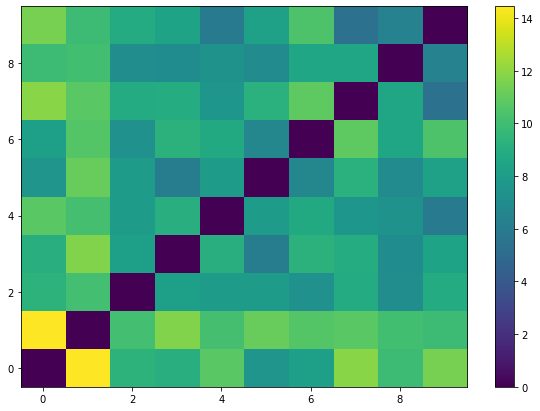

In [6]:
fig, ax = plt.subplots(1, figsize=(10,7))
im = ax.imshow(dist)
fig.colorbar(im)
plt.show()

## 1.2 Experiment with three dimensionality reduction algorithms
* PCA
* UMAP
* T-SNE

In [7]:
df_in=pd.read_csv('train_in.csv',header=None)
train_in=df_in.to_numpy()

df_out=pd.read_csv('train_out.csv',header=None)
train_out=df_out.to_numpy()

def show_data(data,index):
    #Reshape the image and plot it
    img=data[index,:].reshape((16,16))
    plt.imshow(img,cmap='gray')

#Image test    
#show_data(train_in,80)

#Rearrange data depending on 'train_out' value
data=[None for i in range(10)]
for n in range(10):
    data[n]=train_in[np.where(train_out[:,0]==n)[0],:]
    
#show_data(data[9],9)

#Center of each class
centers=[data[n].mean(axis=0) for n in range(10)]


#Read test datasets
df_in=pd.read_csv('test_in.csv',header=None)
test_in=df_in.to_numpy()

df_out=pd.read_csv('test_out.csv',header=None)
test_out=df_out.to_numpy()

#Euclidean n-dimensional distance
def dist(a,b):
    return np.sqrt(np.sum((a-b)**2,axis=1))

#Center of each class
centers=[data[n].mean(axis=0) for n in range(10)]
#Euclidean n-dimensional distance
def dist(a,b):
    return np.sqrt(np.sum((a-b)**2,axis=1))

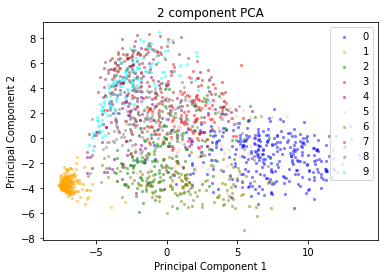

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_in)
reduction_in=pca.transform(train_in)
#reduction_centers=pca.transform(centers_array)


#Plot map
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 12)

colors=['blue','orange','green','red','purple','pink','olive','brown','gray','cyan']
for n in range(10):
    local_data=reduction_in[np.where(train_out[:,0]==n)]
    plt.scatter(local_data[:,0],local_data[:,1],s=10,alpha=0.5,linewidths=0,color=colors[n],label=n)
#    plt.scatter(reduction_centers[n,0],reduction_centers[n,1],marker='x',s=50,color=colors[n])
ax.legend()

2022-09-30 15:54:07.853694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-30 15:54:07.853719: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

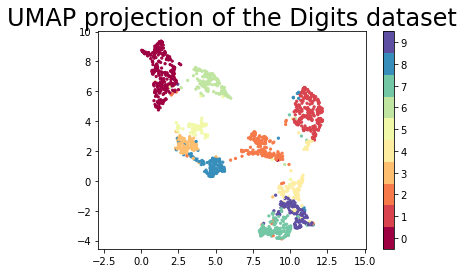

In [9]:
import umap

# Initialise reducer
reducer = umap.UMAP(random_state=42)
reducer.fit(train_in)

# Get results
embedding = reducer.transform(train_in)

# Plot map
plt.scatter(embedding[:, 0], embedding[:, 1], c=train_out, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24)

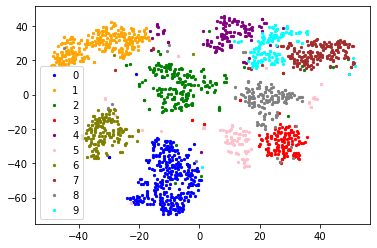

In [10]:
#t-SNE
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
tsne_reduction_in=tsne.fit_transform(train_in)

#Plot map
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

colors=['blue','orange','green','red','purple','pink','olive','brown','gray','cyan']
for n in range(10):
    local_data=tsne_reduction_in[np.where(train_out[:,0]==n)]
    plt.scatter(local_data[:,0],local_data[:,1],s=5,color=colors[n],label=n)
ax.legend()

## 1.3 Euclidean Distance-based classifier

n (real)	Precission
0			79%
1			99%
2			68%
3			77%
4			80%
5			69%
6			87%
7			78%
8			79%
9			77%


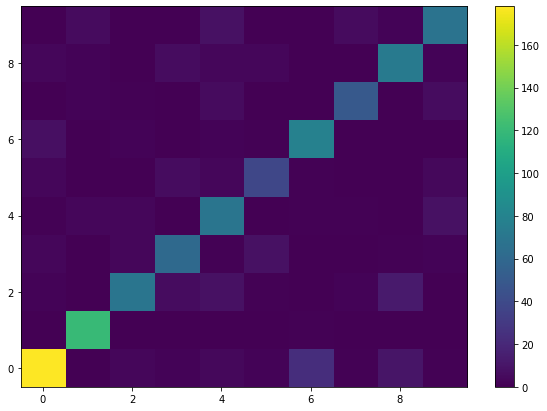

In [11]:
fails=np.array([0 for i in range(10)]) #List of the number of misclassified items
aims=np.array([0 for i in range(10)]) #List of the number of correctly classified items

centers_array=np.array(centers) #Build array from list to ease iteration
confusion_matrix = np.zeros((10,10)) #10x10 map of expected value vs classified value

def classifier(data):
    #Defines the algorithm that classifies the data 
    return np.argmin(dist(centers_array,data))

#Test the algorithm and store the results in the corresponding variables
for i in range(test_in.shape[0]):
    n_pred=classifier(test_in[i,:])
    n_real=test_out[i,0]
    
    if n_pred==n_real:
        aims[n_real]+=1
    else:
        fails[n_real]+=1
    confusion_matrix[n_real,n_pred]+=1

#Calculate the number of correct classifications related to the total number of items
accuracy=aims/(aims+fails)

#Show the results
print('n (real)\tPrecission')
for i in range(accuracy.shape[0]):
    print('{:}\t\t\t{:.0f}%'.format(i,accuracy[i]*100))
    
    
# Euclidean Distance Based Classifier prediction (get matrix)
pred_EDBC = np.array([classifier(test_in[i,:]) for i in range(test_in.shape[0])])


# Plot confusion matrix
fig, ax = plt.subplots(1, figsize=(10,7))
im = ax.imshow(confusion_matrix)
fig.colorbar(im)
plt.show()

## 1.4 K-Nearest-Neighbor

In [12]:
[print(x.shape) for x in [train_in, test_in]]

(1707, 256)
(1000, 256)


[None, None]

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_in, train_out)

# Get the precicted labels from KNN
pred_KNN = neigh.predict(test_in)
# pred_KNN = neigh.predict(train_in)

# Compare with the expected labels
# precision = pred_KNN == test_out[:,0]
precision = pred_KNN == test_out[:,0]
precision[precision==True].size / pred_KNN.size

/home/dario/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.914

In [27]:
def get_CM(pred, test_out, ax=None, **kwargs):
    CM = np.zeros((10,10)) # Confusion Matrix
    for i in range(10):
        for j in range(10):
            CM[i,j] = np.intersect1d(np.where(pred==j), np.where(test_out==i)).size / np.where(test_out==i)[0].size
        # Plot confusion matrix
        ax = ax or plt.gca()
        im = ax.imshow(CM, **kwargs)        
        
    return CM, im

n                  EDBC                 KNN                 
----------------------------------------------
0                  85%                 100%
1                 100%                 100%
2                  83%                  97%
3                  92%                  98%
4                  78%                  96%
5                  76%                  95%
6                  85%                  99%
7                  84%                  99%
8                  84%                  94%
9                  85%                  96%
n                  EDBC                 KNN                 
----------------------------------------------
0                  79%                  98%
1                  99%                  98%
2                  68%                  86%
3                  77%                  89%
4                  80%                  91%
5                  69%                  67%
6                  87%                  96%
7                  78%              

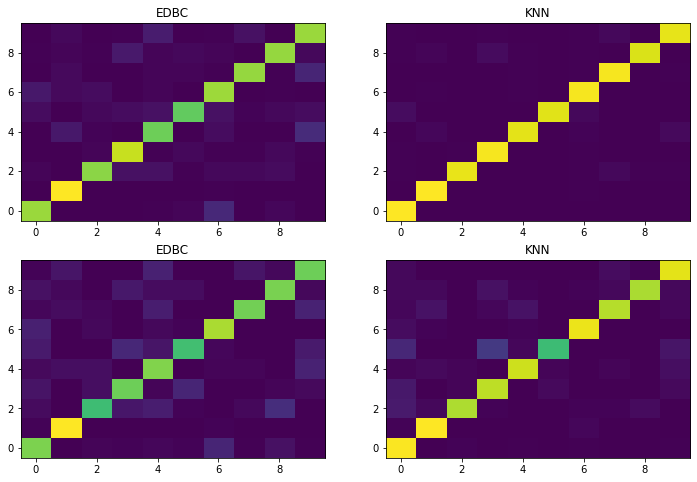

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

def task_14(data_in, data_out, classifier, neigh, ax):
    pred_EDBC = np.array([classifier(data_in[i,:]) for i in range(data_in.shape[0])])
    pred_KNN = neigh.predict(data_in)
    labels = ['EDBC', 'KNN']
    for i,p in enumerate([pred_EDBC, pred_KNN]):
        CM,im = get_CM(p, data_out, ax=ax[i])
        ax[i].set_title(labels[i])
        diag[i] = [CM[i,i] for i in range(CM.shape[0])]
        
    
    print('{:18} {:20} {:20}'.format('n', *labels))
    print('----------------------------------------------')
    # print(['-' for _ in range(20)])
    for i in range(CM.shape[0]):
        print('{:0}{:20.0f}%{:20.0f}%'.format(i,*diag[:,i]*100))
#     print('The digit that is most difficult to classify is 2 (5) for EDBC (KNN).')
    return None

task_14(train_in, train_out, classifier, neigh, ax[0,:])
task_14(test_in, test_out, classifier, neigh, ax[1,:])

In [29]:

    
# fig, ax = plt.subplots(1,2, figsize=(14,7))
# diag = np.zeros((2, 10))

# labels = ['EDBC', 'KNN']
# for i,p in enumerate([pred_EDBC, pred_KNN]):
#     CM, im = get_CM(p, test_out, ax=ax[i], vmin=0, vmax=1)
#     diag[i] = [CM[i,i] for i in range(CM.shape[0])]
    
# fig.colorbar(im)
# plt.show()

In [30]:
# #Show the results
# # print('n (real)\t\t\tPrecission')
# labels = ['EDBC', 'KNN']
# print('{:18} {:20} {:20}'.format('n', *labels))
# print('----------------------------------------------')
# # print(['-' for _ in range(20)])
# for i in range(CM.shape[0]):
#     print('{:0}{:20.0f}%{:20.0f}%'.format(i,*diag[:,i]*100))
# print('The digit that is most difficult to classify is 2 (5) for EDBC (KNN).')